# ULT demo on image encoding using JPEG

2024-09-11 16:19:55.676 | INFO     | __main__:<module>:50 - astronaut
2024-09-11 16:19:55.783 | INFO     | __main__:<module>:50 - binary_blobs
2024-09-11 16:19:55.800 | INFO     | __main__:<module>:50 - brick
2024-09-11 16:19:55.821 | INFO     | __main__:<module>:50 - colorwheel
2024-09-11 16:19:55.848 | INFO     | __main__:<module>:50 - camera
2024-09-11 16:19:55.874 | INFO     | __main__:<module>:50 - cat
2024-09-11 16:19:55.907 | INFO     | __main__:<module>:50 - checkerboard
2024-09-11 16:19:55.926 | INFO     | __main__:<module>:50 - clock
2024-09-11 16:19:55.956 | INFO     | __main__:<module>:50 - coffee
2024-09-11 16:19:56.000 | INFO     | __main__:<module>:50 - coins
2024-09-11 16:19:56.027 | INFO     | __main__:<module>:50 - grass
2024-09-11 16:19:56.058 | INFO     | __main__:<module>:50 - gravel
2024-09-11 16:19:56.090 | INFO     | __main__:<module>:50 - horse
2024-09-11 16:19:56.121 | INFO     | __main__:<module>:50 - logo
2024-09-11 16:19:56.170 | INFO     | __main__:<module

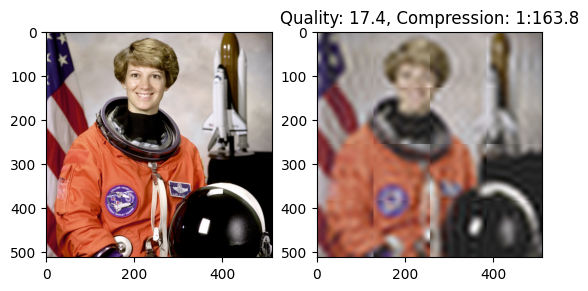

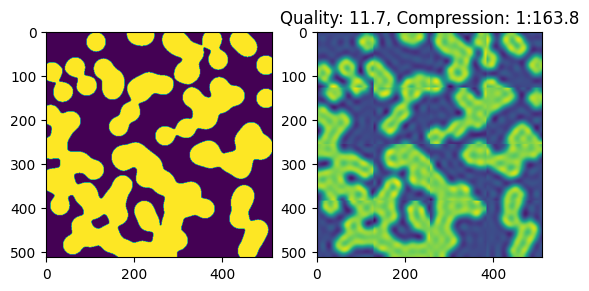

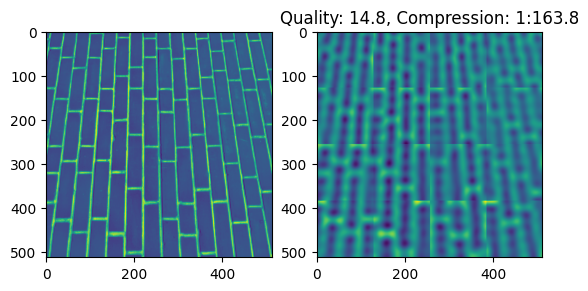

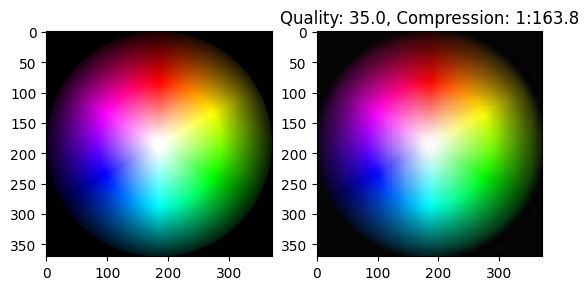

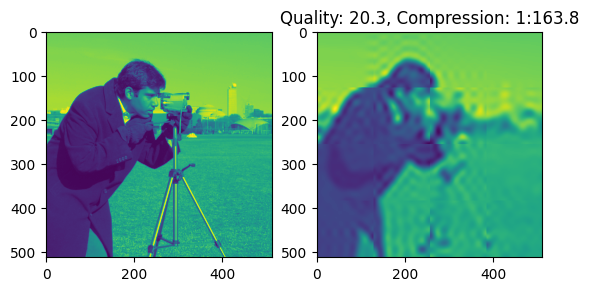

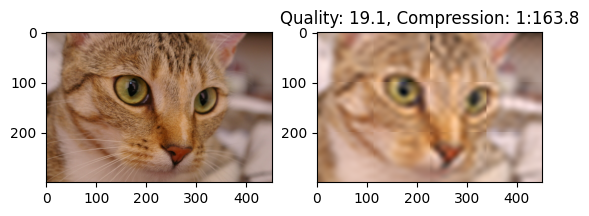

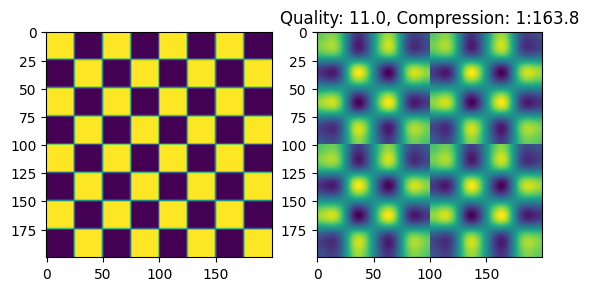

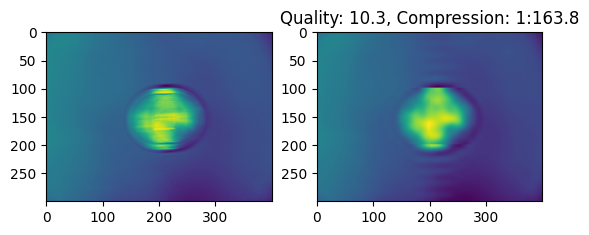

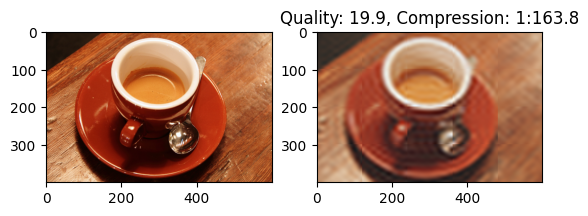

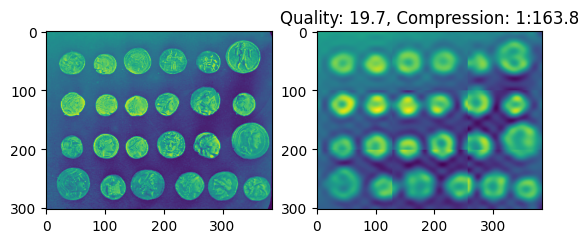

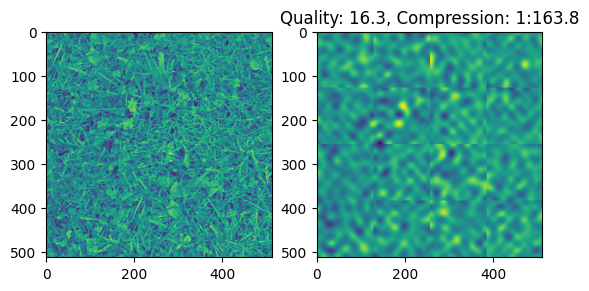

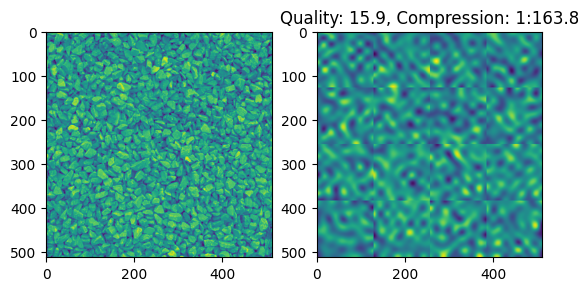

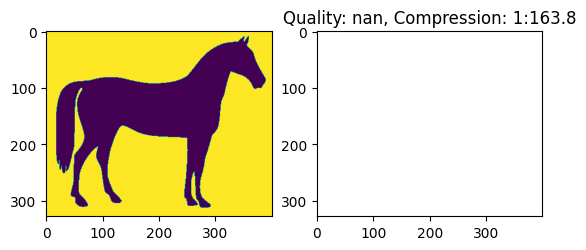

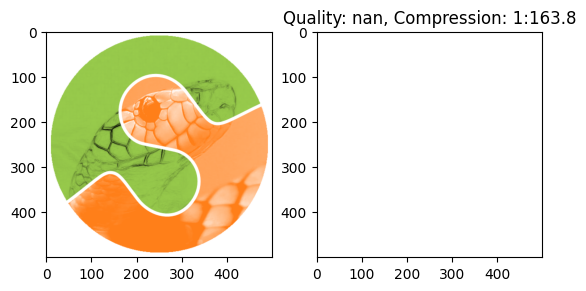

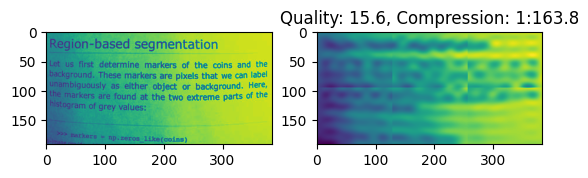

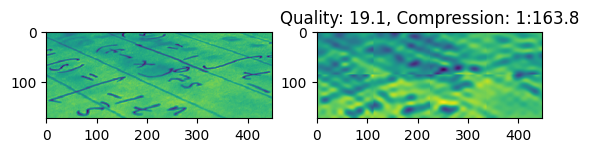

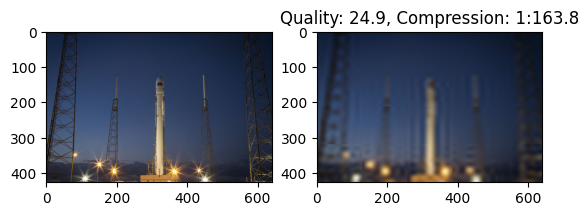

In [7]:
from tqdm import tqdm

from pathlib import Path 
import numpy as np
import cv2
import tqdm
import unicodedata
from skimage.util import view_as_blocks
from skimage import data
from skimage.color import rgb2gray, rgba2rgb
import skimage
import matplotlib.pyplot as plt
import matplotlib
from scipy.fft import dctn, idctn

from loguru import logger

LAST_UNICODE_POINT = 149878
LAST_UNICODE_CHAR = chr(149000)

from m2fm.data.preprocessing.unicode.transforms import UnicodeJPEGTransform
from m2fm.data.preprocessing.unicode.configuration import UnicodeJPEGTransformParameters


images = (
    'astronaut',
    'binary_blobs',
    'brick',
    'colorwheel',
    'camera',
    'cat',
    'checkerboard',
    'clock',
    'coffee',
    'coins',
    'grass',
    'gravel',
    'horse',
    'logo',
    'page',
    'text',
    'rocket',
)
configuration = UnicodeJPEGTransformParameters(patch_size=128, max_coefficients=4)
unicoder = UnicodeJPEGTransform(configuration=configuration)

for name in images:
    caller = getattr(data, name)
    image = caller()
    logger.info(name)
    dimensions = image.shape
    unicoder.add_instance(image)

for name in images:
    caller = getattr(data, name)
    image = caller()

    text = unicoder.encode(image)
    dimensions = image.shape
    
    decoded = unicoder.decode(text, dimensions)
    quality = unicoder.compute_quality(image)
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(image)
    axes[1].imshow(decoded)
    plt.title(f"Quality: {quality:.1f}, Compression: 1:{configuration.patch_size**2 / configuration.max_coefficients**2:.1f}")

2024-05-30 09:26:30.039 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.045 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.086 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.105 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.126 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.133 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.136 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.137 | INFO     | m2fm.unicode_transforms:compress:68 - Compression rate is 1:28.444444444444443
2024-05-30 09:26:30.137 | INFO     | m2fm.unicode_transforms:compress:68

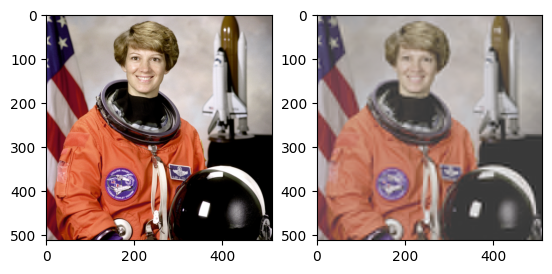

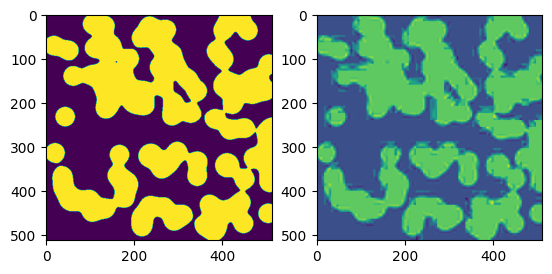

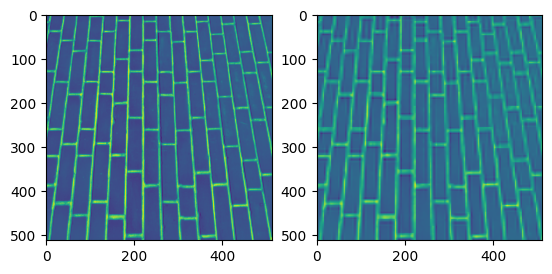

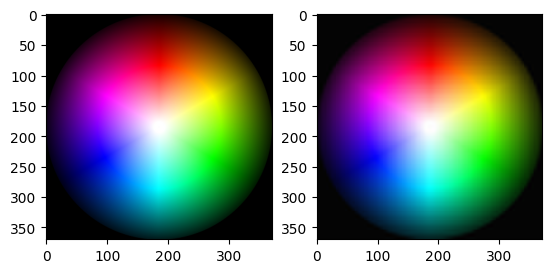

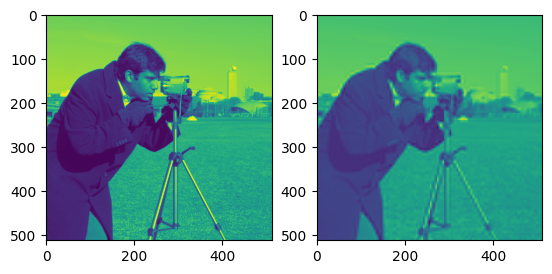

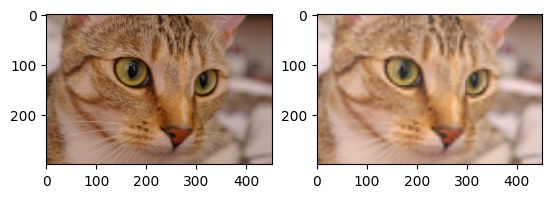

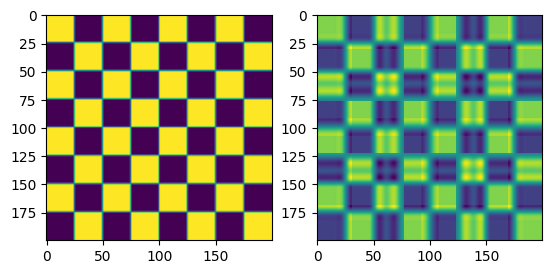

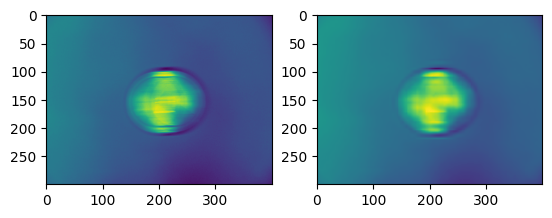

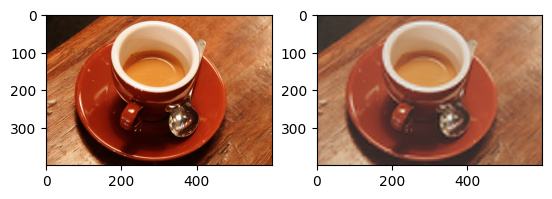

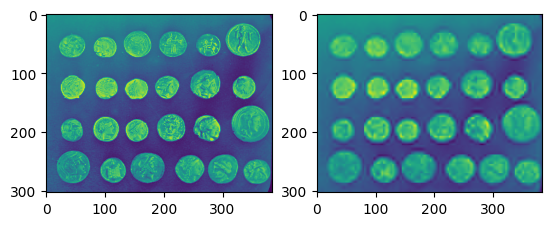

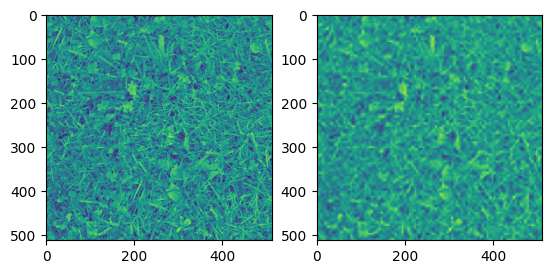

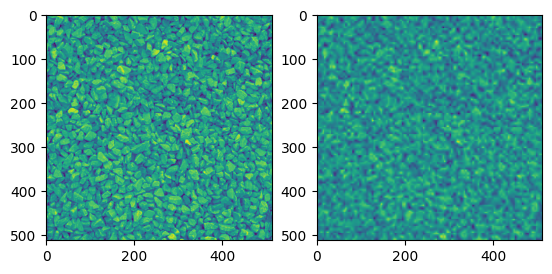

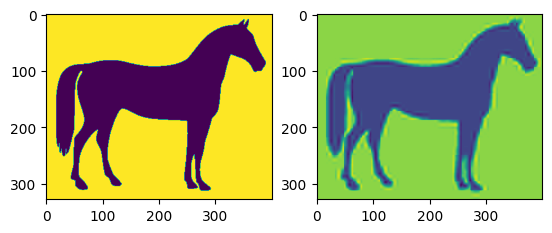

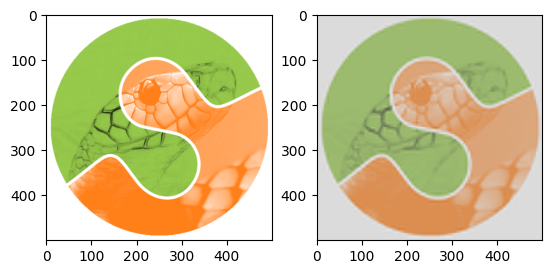

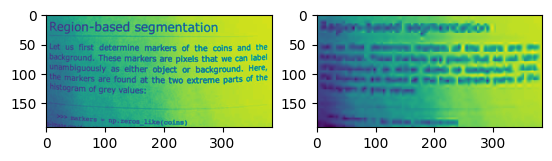

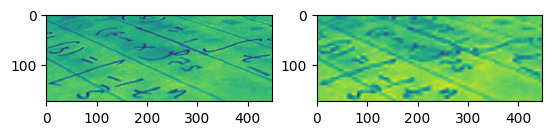

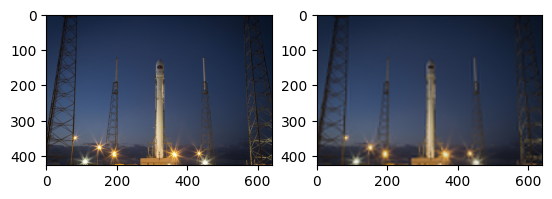

In [2]:
images = (
        "astronaut",
        "binary_blobs",
        "brick",
        "colorwheel",
        "camera",
        "cat",
        "checkerboard",
        "clock",
        "coffee",
        "coins",
        "grass",
        "gravel",
        "horse",
        "logo",
        "page",
        "text",
        "rocket",
    )

unicoder = UnicodeJPEGTransform()
image_arrays = []
for name in images:
    caller = getattr(data, name)
    image_arrays.append(caller())
    
unicoder.add_multiple_images(image_arrays)
unicoder.rebuild_lut()

for name in images:
    caller = getattr(data, name)
    image = caller()
    text = unicoder.encode(image)
    dimensions_image = image.shape
    decoded = unicoder.decode(text, dimensions_image)
    dimensions_decoded = decoded.shape

    fig, axes = plt.subplots(1,2)
    axes[0].imshow(image)
    axes[1].imshow(decoded)    


In [2]:

from tqdm import tqdm

from pathlib import Path 
import numpy as np
import cv2
import tqdm
import unicodedata
from skimage.util import view_as_blocks
from skimage import data
from skimage.color import rgb2gray, rgba2rgb
import skimage
import matplotlib.pyplot as plt
import matplotlib
from scipy.fft import dctn, idctn

from loguru import logger

LAST_UNICODE_POINT = 149878
LAST_UNICODE_CHAR = chr(149000)
from m2fm.unicode_transforms import UnicodeFloatSeriesTransform
